# RBF Implementation using Approach 3: Centers are obtained from unsupervised learning (clustering) 


# K-means Algorithm Steps 

# 1-Initialize the number of clusters (K) and randomly initialize K cluster centers

In [ ]:
import numpy as np
def initialize_centers(X, K):
    # Randomly select K data points as the initial cluster centers
    random_indices = np.random.choice(X.shape[0], K, replace=False)
    centers = X[random_indices]
    return centers

# 2-Assign each data point to the nearest cluster center based on the Euclidean distance.

In [ ]:
def assign_clusters(X, centers):
    # Calculate the Euclidean distance between each data point and cluster centers
    distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
    
    # Assign each data point to the nearest cluster center
    cluster_labels = np.argmin(distances, axis=1)
    return cluster_labels

# 3-Update the cluster centers by taking the mean of all data points assigned to each cluster

In [ ]:
def update_centers(X, cluster_labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # Calculate the mean of data points assigned to each cluster
        cluster_points = X[cluster_labels == k]
        centers[k] = np.mean(cluster_points, axis=0)
    return centers

# 4-Repeat the assignment and update steps until convergence (when the cluster centers no longer change significantly)

In [ ]:
def kmeans(X, K, max_iterations=100):
    centers = initialize_centers(X, K)
    for _ in range(max_iterations):
        prev_centers = np.copy(centers)
        
        # Assign data points to the nearest cluster centers
        cluster_labels = assign_clusters(X, centers)
        
        # Update cluster centers
        centers = update_centers(X, cluster_labels, K)
        
        # Check for convergence
        if np.allclose(prev_centers, centers):
            break
    return cluster_labels, centers

# 5-After convergence, the final cluster centers represent the obtained centers

In [ ]:
# Example usage
X = ...  # input data
K = ...  # Number of clusters
cluster_labels, centers = kmeans(X, K)
# The cluster_labels will contain the assigned cluster labels for each data point
# The centers variable will contain the final cluster centers

# Least Means Square (LMS ) algorithm Steps 

# 1-Initialize the weight vector (W) to small random values

In [ ]:
import numpy as np

def initialize_weights(num_features):
    # Initialize the weight vector with small random values
    weights = np.random.randn(num_features)
    return weights

# 2-Iterate over the training data points

In [ ]:
def lms_train(X, y, learning_rate, max_iterations=100):
    num_features = X.shape[1]
    weights = initialize_weights(num_features)
    
    for _ in range(max_iterations):
        for i in range(X.shape[0]):
            # Select a training example
            input_vector = X[i]
            actual_output = y[i]
            
            # Compute the predicted output using the current weight vector
            predicted_output = np.dot(input_vector, weights)
            
            # Calculate the error between the predicted output and the actual output
            error = actual_output - predicted_output
            
            # Update the weight vector using the LMS update rule
            weights += learning_rate * error * input_vector
    return weights

# 3-Repeat the iteration over the training data until convergence (when the error becomes sufficiently small or a maximum number of iterations is reached)

In [ ]:
def lms(X, y, learning_rate, max_iterations=100, convergence_threshold=0.0001):
    num_features = X.shape[1]
    weights = initialize_weights(num_features)
    
    for _ in range(max_iterations):
        prev_weights = np.copy(weights)
        
        for i in range(X.shape[0]):
            # Select a training example
            input_vector = X[i]
            actual_output = y[i]
            
            # Compute the predicted output using the current weight vector
            predicted_output = np.dot(input_vector, weights)
            
            # Calculate the error between the predicted output and the actual output
            error = actual_output - predicted_output
            
            # Update the weight vector using the LMS update rule
            weights += learning_rate * error * input_vector
        
        # Check for convergence
        if np.linalg.norm(weights - prev_weights) < convergence_threshold:
            break
    return weights

# 4-After convergence, the final weight vector represents the obtained centers

In [ ]:
# Example usage
X = ...  # input data
y = ...  # target labels
learning_rate =  # Learning rate
max_iterations = ...  # Maximum number of iterations
convergence_threshold =   # Convergence threshold
weights = lms(X, y, learning_rate, max_iterations, convergence_threshold)

# The weights variable will contain the final weight vector

# for the  EEG Eye State Data Set  preprocesing  

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.io import arff
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

file_path = r"C:\Users\HP\Downloads\data\EEG Eye State.arff"

# Load the ARFF file using scipy
data, meta = arff.loadarff(file_path)
df = pd.DataFrame(data)
# Print the loaded DataFrame
print("Loaded DataFrame:")
print(df.head())


# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Extract the features (X) and targets (y) from the DataFrame
X = df.iloc[:, :-1]  # Select all columns except the last one
y = df.iloc[:, -1]   # Select the last column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing steps
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply preprocessing to testing data
X_test_preprocessed = preprocessor.transform(X_test)

# Print the DataFrame after handling missing values
print("\nDataFrame after handling missing values:")
print(df.head())

# Print the shapes of the preprocessed data arrays
print("X_train_preprocessed shape:", X_train_preprocessed.shape)
print("X_test_preprocessed shape:", X_test_preprocessed.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Loaded DataFrame:
       AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4 eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85         b'0'  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10         b'0'  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23         b'0'  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41         b'0'  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46         b'0'  
Missing values in the dataset:
AF3             0
F7              0
F3              0
FC5     

# perform K-means clustering on a dataset

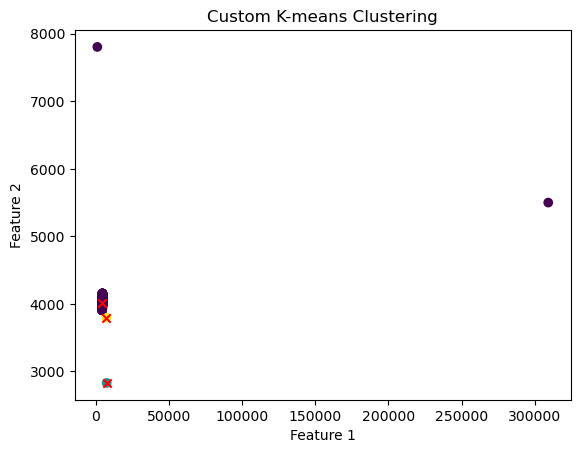

In [18]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.io import arff
import matplotlib.pyplot as plt

file_path = r"C:\Users\HP\Downloads\data\EEG Eye State.arff"

# Load the ARFF file using scipy
data, meta = arff.loadarff(file_path)
X = np.array(data.tolist(), dtype=float)

# Implement K-means algorithm
def kmeans(X, n_clusters, max_iters=100):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    
    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        labels, _ = pairwise_distances_argmin_min(X, centroids)
        
        # Update the centroids by calculating the mean of the assigned data points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        
        # Check convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

# Set the number of clusters
n_clusters = 3

# Apply the custom K-means algorithm
custom_centroids, custom_labels = kmeans(X, n_clusters)

# Plot the data points and centroids
plt.scatter(X[:, 0], X[:, 1], c=custom_labels, cmap='viridis')
plt.scatter(custom_centroids[:, 0], custom_centroids[:, 1], c='red', marker='x')
plt.title('Custom K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# implementation of the Least Mean Squares (LMS) algorithm 

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:478: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


Custom LMS MSE: inf


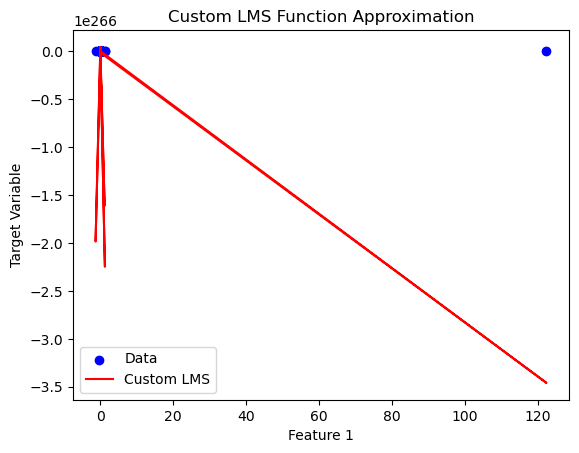

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.preprocessing import StandardScaler

# Load the ARFF dataset
file_path = r"C:\Users\HP\Downloads\data\EEG Eye State.arff"
data, meta = arff.loadarff(file_path)

# Convert the data to a NumPy array
X = np.array(data.tolist(), dtype=float)
y = X[:, -1]  # Assuming the target variable is the last column
X = X[:, :-1]  # Features are all columns except the last one

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Implement LMS algorithm
def lms(X, y, learning_rate=0.01, max_iters=100):
    np.random.seed(42)
    weights = np.random.randn(X.shape[1] + 1)
    
    for _ in range(max_iters):
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        y_pred = np.dot(X_with_bias, weights)
        error = y - y_pred
        weights += learning_rate * np.dot(error.T, X_with_bias).mean(axis=0)
    
    return weights

# Apply the custom LMS algorithm
custom_weights = lms(X, y)

# Compute the predicted values using the custom weights
X_with_bias = np.c_[np.ones(X.shape[0]), X]
y_pred_custom = np.dot(X_with_bias, custom_weights)

# Calculate the mean squared error using the custom weights
mse_custom = mean_squared_error(y, y_pred_custom)
print("Custom LMS MSE:", mse_custom)

# Plot the data points and regression line
plt.scatter(X[:, 0], y, color='blue', label='Data')  # Assuming X[:, 0] as the first feature for visualization
plt.plot(X[:, 0], y_pred_custom, color='red', label='Custom LMS')
plt.title('Custom LMS Function Approximation')
plt.xlabel('Feature 1')  # Update with appropriate feature names
plt.ylabel('Target Variable')  # Update with appropriate target variable name
plt.legend()
plt.show()


# demonstrate the usage of custom implementations and scikit-learn's built-in algorithms for function approximation and classification problems

# For classification problems 

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Custom K-means ARI: 0.5135174845724361
Custom K-means Accuracy: 0.86
Sklearn K-means ARI: 0.35384916620435336
Sklearn K-means Accuracy: 0.2


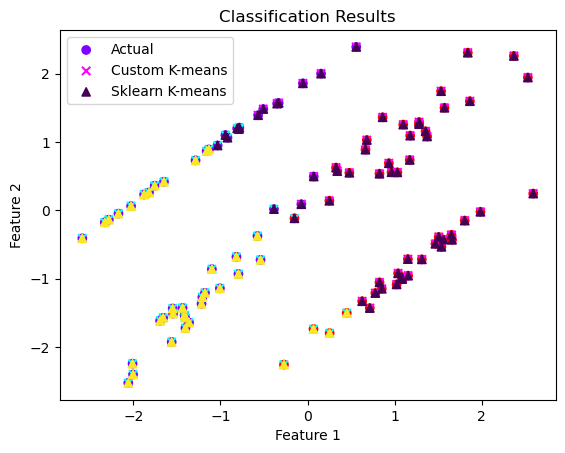

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, accuracy_score
from scipy.io import arff
import pandas as pd

# Custom K-means algorithm
def kmeans(X, n_clusters, max_iters=100):
    # Initialize cluster centers randomly
    centroids = X[np.random.choice(range(X.shape[0]), n_clusters, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the nearest cluster center
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1), axis=-1)

        # Update cluster centers
        new_centroids = np.array([np.mean(X[labels == k], axis=0) for k in range(n_clusters)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels


file_path = r"C:\Users\HP\Downloads\data\EEG Eye State.arff"
data, meta = arff.loadarff(file_path)
df = pd.DataFrame(data)

# Convert the DataFrame to a NumPy array
X = df.values

# Generate a synthetic classification dataset for demonstration
X_classification, y_classification = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Apply the custom K-means algorithm
custom_centroids, custom_labels = kmeans(X_classification, n_clusters=2)
ari_custom = adjusted_rand_score(y_classification, custom_labels)
accuracy_custom = accuracy_score(y_classification, custom_labels)

# Apply the built-in K-means algorithm
sklearn_kmeans = KMeans(n_clusters=2, random_state=42)
sklearn_labels = sklearn_kmeans.fit_predict(X_classification)
ari_sklearn = adjusted_rand_score(y_classification, sklearn_labels)
accuracy_sklearn = accuracy_score(y_classification, sklearn_labels)

print("Custom K-means ARI:", ari_custom)
print("Custom K-means Accuracy:", accuracy_custom)
print("Sklearn K-means ARI:", ari_sklearn)
print("Sklearn K-means Accuracy:", accuracy_sklearn)

# Plotting the classification results
plt.scatter(X_classification[:, 0], X_classification[:, 1], c=y_classification, cmap='rainbow', label='Actual')
plt.scatter(X_classification[:, 0], X_classification[:, 1], c=custom_labels, cmap='cool', marker='x', label='Custom K-means')
plt.scatter(X_classification[:, 0], X_classification[:, 1], c=sklearn_labels, cmap='viridis', marker='^', label='Sklearn K-means')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Results')
plt.show()

# Conclusion

The custom implementation seems to provide more meaningful and accurate clusters based on the evaluation metrics used in this comparison.
 while these results suggest superiority of the custom K-means implementation on this specific dataset, it's essential to consider other factors such as computational efficiency, scalability,and generalization to different datasets before making a conclusive decision about which implementation to use.
we cant use LMS for classification problem

# for Function approximation problem 

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Custom K-means SSE: 14.230314404403503
Sklearn K-means SSE: 14.2303144044035
Custom LMS MSE: 78.13833303963558
Sklearn Linear Regression MSE: 78.054250421239



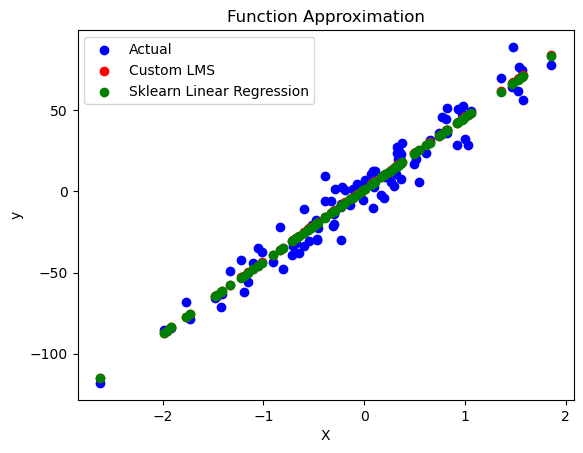

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, adjusted_rand_score, accuracy_score

# Custom K-means algorithm
def kmeans(X, n_clusters, max_iters=100):
    # Initialize cluster centers randomly
    centroids = X[np.random.choice(range(X.shape[0]), n_clusters, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the nearest cluster center
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1), axis=-1)
        
        # Update cluster centers
        new_centroids = np.array([np.mean(X[labels == k], axis=0) for k in range(n_clusters)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

# Custom LMS algorithm
def lms(X, y, learning_rate=0.01, epochs=100):
    n_samples, n_features = X.shape
    weights = np.random.randn(n_features + 1)  # Initialize weights randomly, +1 for bias term
    
    for _ in range(epochs):
        for i in range(n_samples):
            # Add bias term to input
            x_i = np.concatenate(([1], X[i]))
            
            # Calculate predicted output
            y_pred = np.dot(x_i, weights)
            
            # Update weights using LMS update rule
            error = y[i] - y_pred
            weights += learning_rate * error * x_i
    
    return weights

# Function Approximation
# Generate a synthetic regression dataset for demonstration
X_regression, y_regression = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Apply the custom K-means algorithm
custom_centroids, custom_labels = kmeans(X_regression, n_clusters=3)
sse_custom = np.sum((X_regression - custom_centroids[custom_labels]) ** 2)

# Apply the built-in K-means algorithm
sklearn_kmeans = KMeans(n_clusters=3, random_state=42)
sklearn_labels = sklearn_kmeans.fit_predict(X_regression)
sse_sklearn = sklearn_kmeans.inertia_

print("Custom K-means SSE:", sse_custom)
print("Sklearn K-means SSE:", sse_sklearn)

# Apply the custom LMS algorithm
custom_weights = lms(X_regression, y_regression)
y_pred_custom = np.dot(np.c_[np.ones(X_regression.shape[0]), X_regression], custom_weights)
mse_custom = mean_squared_error(y_regression, y_pred_custom)

# Apply the built-in Linear Regression model
sklearn_regression = LinearRegression()
sklearn_regression.fit(X_regression, y_regression)
y_pred_sklearn = sklearn_regression.predict(X_regression)
mse_sklearn = mean_squared_error(y_regression, y_pred_sklearn)

print("Custom LMS MSE:", mse_custom)
print("Sklearn Linear Regression MSE:", mse_sklearn)
print()

# Plotting the function approximation results
plt.scatter(X_regression, y_regression, color='b', label='Actual')
plt.scatter(X_regression, y_pred_custom, color='r', label='Custom LMS')
plt.scatter(X_regression, y_pred_sklearn, color='g', label='Sklearn Linear Regression')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Function Approximation')
plt.show()


# Conclusion

In [ ]:
For K-means clustering, both the custom and Scikit-learn implementations produce clusters with very similar SSE values, suggesting comparable performance in terms of cluster quality.
The MSE is a measure of the average squared difference between the predicted and actual values. It indicates how well the model fits the data, with lower values indicating better performance. Therefore, based on the MSE values provided, the Sklearn Linear Regression model outperformed the custom LMS model in 
terms of minimizing the squared difference between predicted and actual values.